In [44]:
import networkx as nx
import nxpd
import numpy as np
import GraphTools as gt


## Afternoon Lecture

### Objectives: answer the following

- What is *centrality* and how is it useful?
- How do you find the different kinds of centrality?
- What is a *community* within a graph?
- How do you detect communities?

### Relationship to machine learning
We can use the shape of a graph to featurize nodes! We want to find how important a single node is in a graph (centrality) and how we can meaningfully group together many nodes (communities).

### Centrality Measures

Often it is important for us to measure the *importance* of a node in a graph.  There are **many** applications for different versions of this idea.

- Fraud rings in insurance claims
- Influencers
- Bottlenecks for network traffic
- Page Rank

### Degree Centrality

The **standardized degree centrality** measure of a node, $v$, in a graph is defined by:

$$\text{standardized_degree_centrality}(v) = \frac{\text{degree}(v)}{\text{number of nodes in } G - 1}$$

**Discussion:** Why subtract 1 from the total number of nodes to standardize? Why standardize at all?

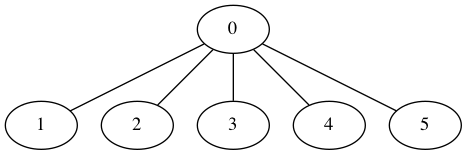

In [45]:
g_star = {
    0: {1, 2, 3, 4, 5},
    1: {0},
    2: {0},
    3: {0},
    4: {0},
    5: {0}
}

G_star = nx.from_dict_of_lists(g_star)
nxpd.draw(G_star, show='ipynb')

**Exercise:** Compute the degree centrality of the nodes in this graph.

*Hint*:  You should only have to compute the centrality of *two* nodes explicitly.

### Betweenness Centrality

While the *degree centrality* is intuitive and easy to calculate, it often misses important features of a graph we would intuitively recognise as important.

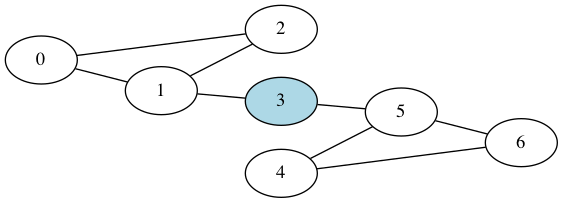

In [46]:
g_triangle = {
    0: {1, 2},
    1: {0, 2},
    2: {0, 1},
    3: {1, 5},
    4: {5, 6},
    5: {4, 6},
    6: {4, 5},
}

G_triangle = nx.from_dict_of_lists(g_triangle)
G_triangle.graph['rankdir'] = 'LR'
gt.color_nodes(G_triangle, [3], 'lightblue')
nxpd.draw(G_triangle, show='ipynb')

**Exercise:** What is the degree centrality of the highlighted node?

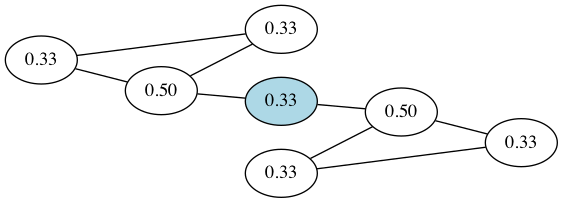

In [47]:
degree_centralities = gt.format_dict_of_floats(nx.degree_centrality(G_triangle))
gt.label_nodes(G_triangle, degree_centralities)
nxpd.draw(G_triangle, show='ipynb')

The breadth first search algorithm can be used to efficiently calculate the number of the number of shortest paths through a given node.

$$\sigma_{uv} = \text{# of shortest paths between u and v}$$
$$\sigma_{uv}(w) = \text{# of shortest paths between u and v that pass through w}$$

The *betweenness centrality* of a node measures the average fraction of shortest paths that pass through that node. Or, loosely, how often we need to pass through the node to move around the graph

$$\text{betweenness_centrality}(w) = \sum_{u \neq w, v \neq w} \frac{ \sigma_{uv}(w) }{ \sigma_{uv} }$$

The *normalized betweenness centrality* is:

$$\frac{ \text{betweenness_centrality}(w) }{ \frac{(n-1)(n-2)}{2} }$$

**Question:** Whats with the denominator?

**Activity:** Compute the betweenness centrality of all the nodes in the two triangle graph.

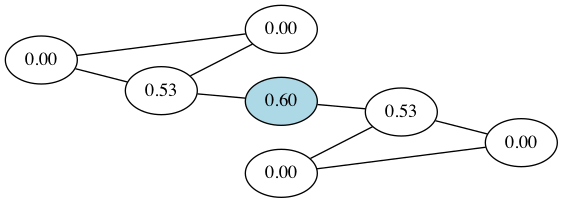

In [48]:
between_centralities = gt.format_dict_of_floats(nx.betweenness_centrality(G_triangle))
gt.label_nodes(G_triangle, between_centralities)
nxpd.draw(G_triangle, show='ipynb')

We will also see later that the concept of betweenness centrality can also be applies to edges in the graph, resulting in cool pictures like this:

![Roads Betweeness Centrality](images/edge-betweeness.png)

### Eigenvector Centrality

Suppose we try to invent a centrality measure that satisfies the following appealing property

> The centrality of a node $v$ is always proportional to the sum of the centralities of its neighbors.

or, a little more clearly

> A node is important if it is linked to other important nodes

If $A$ is the adjacency matrix of a graph, and $x$ is the vector containing our postulated centrality measures, we can express this idea as system of linear equations

$$x_i = \alpha\sum_j A_{ij} x_j$$

or, as the single matrix equation

$$x = \alpha A x$$

Cock your head sideways and re-express that as:

$$\frac{1}{\alpha}x = A x$$

And then note that $\alpha$ is a proportionality constant so we can just dub its reciprocal $\frac{1}{\alpha} = \lambda$ and we get:

$$\lambda x = A x$$

Oh dip that's the eigenvector problem.

If we take $\lambda_{max}$, the *largest* eigenvalue of $A$, then the solution vector $x$ *defines* the **eigenvector centrality** of our graph.

$$A x_{\text{eigenvector centrality}} = \lambda_{\text{max}} x_{\text{eigenvector centrality}}$$

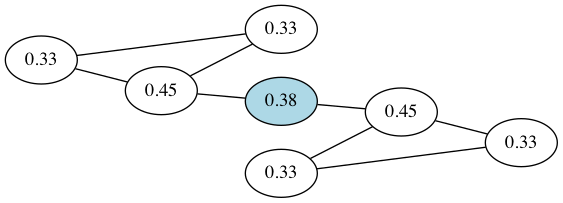

In [49]:
eigen_centralities = gt.format_dict_of_floats(nx.eigenvector_centrality(G_triangle))
gt.label_nodes(G_triangle, eigen_centralities)
nxpd.draw(G_triangle, show='ipynb')

Scrape $\alpha = \frac{1}{\lambda}$ right out of the graph:

In [50]:
# central node
0.38 / (0.45+0.45)

0.4222222222222222

In [51]:
# just to the left of center
0.45 / (0.33+0.33+0.38)

0.4326923076923077

In [52]:
# periphery
0.33 / (0.33+0.45)

0.4230769230769231

In [53]:
A = nx.adjacency_matrix(G_triangle).todense()
A

matrix([[0, 1, 1, 0, 0, 0, 0],
        [1, 0, 1, 1, 0, 0, 0],
        [1, 1, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 1, 1],
        [0, 0, 0, 1, 1, 0, 1],
        [0, 0, 0, 0, 1, 1, 0]], dtype=int64)

In [54]:
eigval, eigvec = np.linalg.eig(A)
eigval

array([-1.8136065 , -1.        ,  0.47068342,  2.34292308,  2.        ,
       -1.        , -1.        ])

In [55]:
# behold, our eigenvector centralities
-eigvec.T[ eigval.argmax() ]

matrix([[0.33480527, 0.44961773, 0.33480527, 0.38380921, 0.33480527,
         0.44961773, 0.33480527]])

In [56]:
# and here's our alpha
1/eigval.max()

0.4268172554835457

Here's a picture from wikipedia that shows the concept a bit more clearly ([source](https://en.wikipedia.org/wiki/Centrality)).

![Eigenvector Centrality](images/eigenvector-centrality.png)

**Note:** Eigenvector centrality was a fundamental component of early versions of *page rank*, Google's web page ranking algorithm.

**Discussion:** Recap and contrast the type of information the different centrality measures we learned can give you.

Which centrality measure would you use to...
* Find a twitter user who is popular?
* Find a twitter user who is important in multiple fields?
* Find a twitter user who is influential?

### Communities

![Simple Communities](images/simple-communities.jpg)

Formally a **community** is a subset of the nodes in a graph.  We say a graph is *partitioned into communities* if each node is assigned to exactly one community. 

We would like to create communities so that the following vague idea is true:

> Points in the *same* community are more likely to have an edge between them than points in *different* communities.

Just like in clustering, we need a way to *measure* how true this is for a given partition.

### Modularity

The "goodness" of a partition into communities is measured by *modularity*, which is a somewhat tricky concept.

The *idea* of modularity is to compare the graph we have to what we would expect if we erased the actual edges and drew *random* edges in their place.


Imagine taking a graph and removing the middle of each edge.


![](images/edge_stubs.png)

* If $m$ is the original number of edges, we now have $2m$ stubs. 
* Each node $i$ has $d(i)$ stubs coming out, where $d(i)$ is the degree of node $i$
* Now randomly connect the stubs together. 
  * We can calculate the probability that once the stubs are randomly reconnected, node $i$ gets connected to node $j$

$$
\begin{align}
\text{P}(\text{single edge stub gets connected to }j) & = \frac{d(j)}{2m} \\
\text{Expected number of edges from }i\text{ to }j & = \frac{d(i)d(j)}{2m} \\
\text{Expected number of edges between nodes within one community} & = \sum_{i,j \in C} \frac{d(i)d(j)}{2m}
\end{align}
$$

In [71]:
# do a calculation from the above example

The **modularity** of a partitioning of a graph $G$ into a set of communities $\mathscr{C}$ is defined as the *true* number of edges within communities minus the *expected* number of edges under this random edge assignment (all divided by $2m$)

$$
\text{modularity}(G,\mathscr{C}) = \frac{1}{2m}\sum_{C\in\mathscr{C}}\left[\sum_{i,j\in C}\left(A_{ij} - \frac{d(i)d(j)}{2m}\right)\right]
$$

Where $A_{ij}$ is the entry in the adjacency matrix: $1$ if nodes $i$ and $j$ are connected, $0$ if not.

Modularity (also called [Louvain Modularity](https://en.wikipedia.org/wiki/Louvain_Modularity)) can range from -1 to 1

### Creating Communities

Now that we can measure how good a breakdown into communities is (using modularity) we need an algorithm to create communities for us.

**Inspiration:** If our graph breaks up into *disconnected* pieces, these are certainly good communities.

**Idea:** Remove the *minimal* number of edges needed to break the graph into disconnected pieces.  The resulting pieces should be good communities.

Here we can remove the grey edges, and the resulting communities are all colored.

![Simple Communities](images/simple-communities.jpg)

How can we identify the grey edges if

- The graph was not draws so suggestively
- Nothing was colored

**Discussion:** Brainstorm.  How should we identify the edges to remove?

### Betweenness Centrality Redux

Earlier, we defined the **betweenness centrality** measure of a *node* as the number of shortest paths that pass through that node.

This idea could equally well apply to *edges*!

![Roads Betweeness Centrality](images/edge-betweeness.png)

The **betweenness centrality** of an edge $e$ is:

$$\text{betweenness_centrality}(e) = \sum_{u \neq v} \frac{ \sigma_{uv}(e) }{ \sigma_{uv} }$$

Where the $\sigma$s have the same meaning as before:

$$\sigma_{uv} = \text{# of shortest paths between u and v}$$
$$\sigma_{uv}(e) = \text{# of shortest paths between u and v that contain edge } e$$

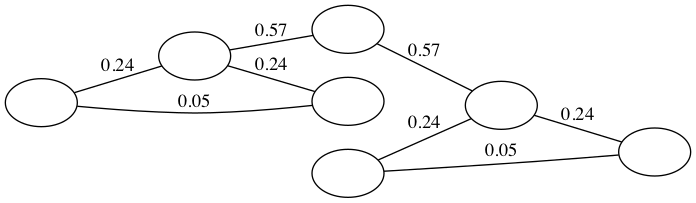

In [72]:
between_centralities = gt.format_dict_of_floats(nx.edge_betweenness_centrality(G_triangle))
gt.reset_graph(G_triangle)
gt.label_edges(G_triangle, between_centralities)
nxpd.draw(G_triangle, show='ipynb')

### Girvan-Newman Algorithm

The **Girvan-Newman** algorithm is a simple way to break a graph down into communities.

    Repeat until satisfied (i.e., you've found a partition that maximizes modularity):
        Repeat until a new connected component is created:
            Compute the edge betweenness centrality of the current graph.
            Remove the edge with highest betweenness centrality.
        Return the connected components of resulting graph as community labels.

In [73]:
# Re-defining so we get some node labels
g_triangle = {
    0: {1, 2},
    1: {0, 2},
    2: {0, 1},
    3: {1, 5},
    4: {5, 6},
    5: {4, 6},
    6: {4, 5},
}

G_triangle = nx.from_dict_of_lists(g_triangle)
G_triangle.graph['rankdir'] = 'LR'

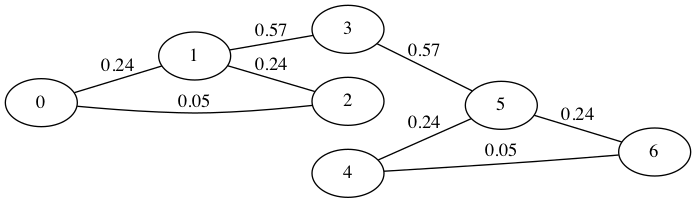

In [74]:
between_centralities = gt.format_dict_of_floats(nx.edge_betweenness_centrality(G_triangle))
gt.label_edges(G_triangle, between_centralities)
nxpd.draw(G_triangle, show='ipynb')

In [75]:
G_triangle.remove_edge(1, 3)

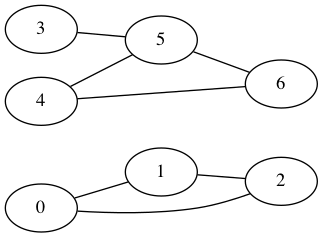

In [76]:
gt.remove_labels(G_triangle, nodes=False)
nxpd.draw(G_triangle, show='ipynb')

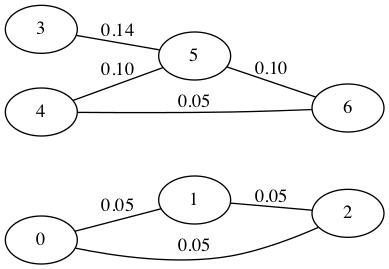

In [77]:
between_centralities = gt.format_dict_of_floats(nx.edge_betweenness_centrality(G_triangle))
gt.label_edges(G_triangle, between_centralities)
nxpd.draw(G_triangle, show='ipynb')

In [78]:
G_triangle.remove_edge(3, 5)

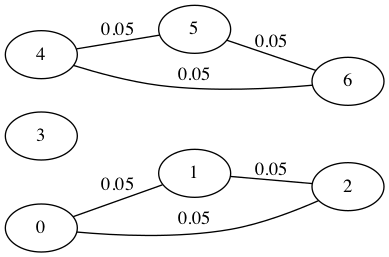

In [79]:
between_centralities = gt.format_dict_of_floats(nx.edge_betweenness_centrality(G_triangle))
gt.label_edges(G_triangle, between_centralities)
nxpd.draw(G_triangle, show='ipynb')